In [20]:
import pandas as pd
data = pd.read_csv('loan_dataset.csv', low_memory=False)
data.head()

id grade  annual_inc  short_emp  emp_length_num home_ownership  \
0  11454641     A    100000.0          1               1           RENT   
1   9604874     A     83000.0          0               4            OWN   
2   9684700     D     78000.0          0              11       MORTGAGE   
3   9695736     D     37536.0          0               6       MORTGAGE   
4   9795013     D     65000.0          0              11       MORTGAGE   

     dti             purpose        term  last_delinq_none  \
0  26.27         credit_card   36 months                 1   
1   5.39         credit_card   36 months                 0   
2  18.45  debt_consolidation   60 months                 1   
3  12.28             medical   60 months                 0   
4  11.26  debt_consolidation   36 months                 0   

   last_major_derog_none  revol_util  total_rec_late_fee  od_ratio  bad_loan  
0                    NaN        43.2                 0.0  0.160624         0  
1                    NaN        21.5                 0.0  0.810777         0  
2                    NaN        46.3                 0.0  0.035147         1  
3                    NaN        10.7                 0.0  0.534887         1  
4                    NaN        15.2                 0.0  0.166500         0

In [21]:
data.shape

(20000, 15)

In [22]:
data.columns

Index(['id', 'grade', 'annual_inc', 'short_emp', 'emp_length_num',
       'home_ownership', 'dti', 'purpose', 'term', 'last_delinq_none',
       'last_major_derog_none', 'revol_util', 'total_rec_late_fee', 'od_ratio',
       'bad_loan'],
      dtype='object')

In [4]:
data.describe().round(3)

id   annual_inc  short_emp  emp_length_num        dti  \
count  2.000000e+04    20000.000  20000.000       20000.000  19846.000   
mean   7.590662e+06    73349.578      0.112           6.821     16.588   
std    1.609593e+06    45198.567      0.316           3.774      7.586   
min    5.860400e+05     8412.000      0.000           0.000      0.000   
25%    6.206283e+06    47000.000      0.000           3.000     10.852   
50%    7.378896e+06    65000.000      0.000           7.000     16.190   
75%    8.766235e+06    88000.000      0.000          11.000     22.060   
max    1.145464e+07  1000000.000      1.000          11.000     34.990   

       last_delinq_none  last_major_derog_none  revol_util  \
count         20000.000                574.000   20000.000   
mean              0.547                  0.760      55.958   
std               0.498                  0.428      42.117   
min               0.000                  0.000       0.000   
25%               0.000                  1.000      38.800   
50%               1.000                  1.000      57.100   
75%               1.000                  1.000      73.900   
max               1.000                  1.000    5010.000   

       total_rec_late_fee   od_ratio  bad_loan  
count           20000.000  20000.000   20000.0  
mean                0.291      0.504       0.2  
std                 3.109      0.288       0.4  
min                 0.000      0.000       0.0  
25%                 0.000      0.257       0.0  
50%                 0.000      0.507       0.0  
75%                 0.000      0.754       0.0  
max                96.467      1.000       1.0

In [23]:
import numpy as np
data.describe()

id      annual_inc     short_emp  emp_length_num  \
count  2.000000e+04    20000.000000  20000.000000     20000.00000   
mean   7.590662e+06    73349.578350      0.112500         6.82140   
std    1.609593e+06    45198.567255      0.315989         3.77423   
min    5.860400e+05     8412.000000      0.000000         0.00000   
25%    6.206283e+06    47000.000000      0.000000         3.00000   
50%    7.378896e+06    65000.000000      0.000000         7.00000   
75%    8.766235e+06    88000.000000      0.000000        11.00000   
max    1.145464e+07  1000000.000000      1.000000        11.00000   

                dti  last_delinq_none  last_major_derog_none    revol_util  \
count  19846.000000      20000.000000             574.000000  20000.000000   
mean      16.587841          0.546600               0.759582     55.958148   
std        7.585812          0.497836               0.427710     42.117456   
min        0.000000          0.000000               0.000000      0.000000   
25%       10.852500          0.000000               1.000000     38.800000   
50%       16.190000          1.000000               1.000000     57.100000   
75%       22.060000          1.000000               1.000000     73.900000   
max       34.990000          1.000000               1.000000   5010.000000   

       total_rec_late_fee      od_ratio     bad_loan  
count        20000.000000  20000.000000  20000.00000  
mean             0.290622      0.504430      0.20000  
std              3.108654      0.287720      0.40001  
min              0.000000      0.000077      0.00000  
25%              0.000000      0.257356      0.00000  
50%              0.000000      0.506681      0.00000  
75%              0.000000      0.753771      0.00000  
max             96.466600      0.999894      1.00000

In [24]:
data["bad_loan"].value_counts()

0    16000
1     4000
Name: bad_loan, dtype: int64

In [26]:
loan = data.bad_loan.value_counts().to_frame().rename(columns={"bad_loan":"absolute"})
loan["percent"] = (loan.apply(lambda x: x/x.sum()*100).round(2))


In [25]:
loan

absolute  percent
0     16000     80.0
1      4000     20.0

In [9]:
import matplotlib.pyplot as plt

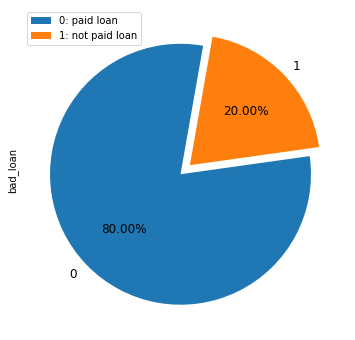

In [10]:
data.bad_loan.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["0: paid loan","1: not paid loan"]);